In [1]:
!python --version

Python 3.10.12


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/PyClusEval')

In [4]:
import matplotlib.pyplot as plt
from Framework.DatasetReader.DatasetReader import TimeSeriesAccountantDataset
dr_url = "/content/drive/MyDrive/Colab Notebooks/PyClusEval/Framework/Datasets/train"
accountant_reader = TimeSeriesAccountantDataset(dr_url)
plt.rcParams.update({'font.size': 10})
from Framework.utilities import *
window = 50
show_snaps = True
save_csv = False

#per salvare su CSV usare la funzione save_to_csv all'iterno di utilities
# basta fornire in input gli oggetti corrispondenti che venogno generati da full_array_of_tests

Executing Clustream | Threshold: 10000, p: 2.3, N Clusters: 10, window: 50: 100%|██████████| 3277/3277 [00:00<00:00, 5558.66it/s]
Computing Centroids: 100%|██████████| 65/65 [00:00<00:00, 9856.11it/s]


Len original_data (get_dataset()):  3287
dimension value:  0
Len list_timestamp:  65
Shape original_function:  (3287, 1)
Len new_function:  65
Len original_data (after transform_range_function()):  65
Len list_min_centroid:  65
Len list_max_centroid:  65
Len list_mean_centroid:  65


Clustream: 100%|██████████| 3/3 [00:00<00:00, 616.51it/s]


Len list_value:  65
Len original_data:  65
Len list_value:  65
Len original_data:  65
Len list_value:  65
Len original_data:  65


Plotting Clustream Clusters: 100%|██████████| 65/65 [00:01<00:00, 41.00it/s]


SSQ:  222426.27974382017
ASSQ 342809.92549085926
TSSQ:  17771770.315956764
Pearson:  (array([0.95318217, 0.9313188 , 0.94600175]), array([601.86527778, 563.58686759, 154.98418892]))


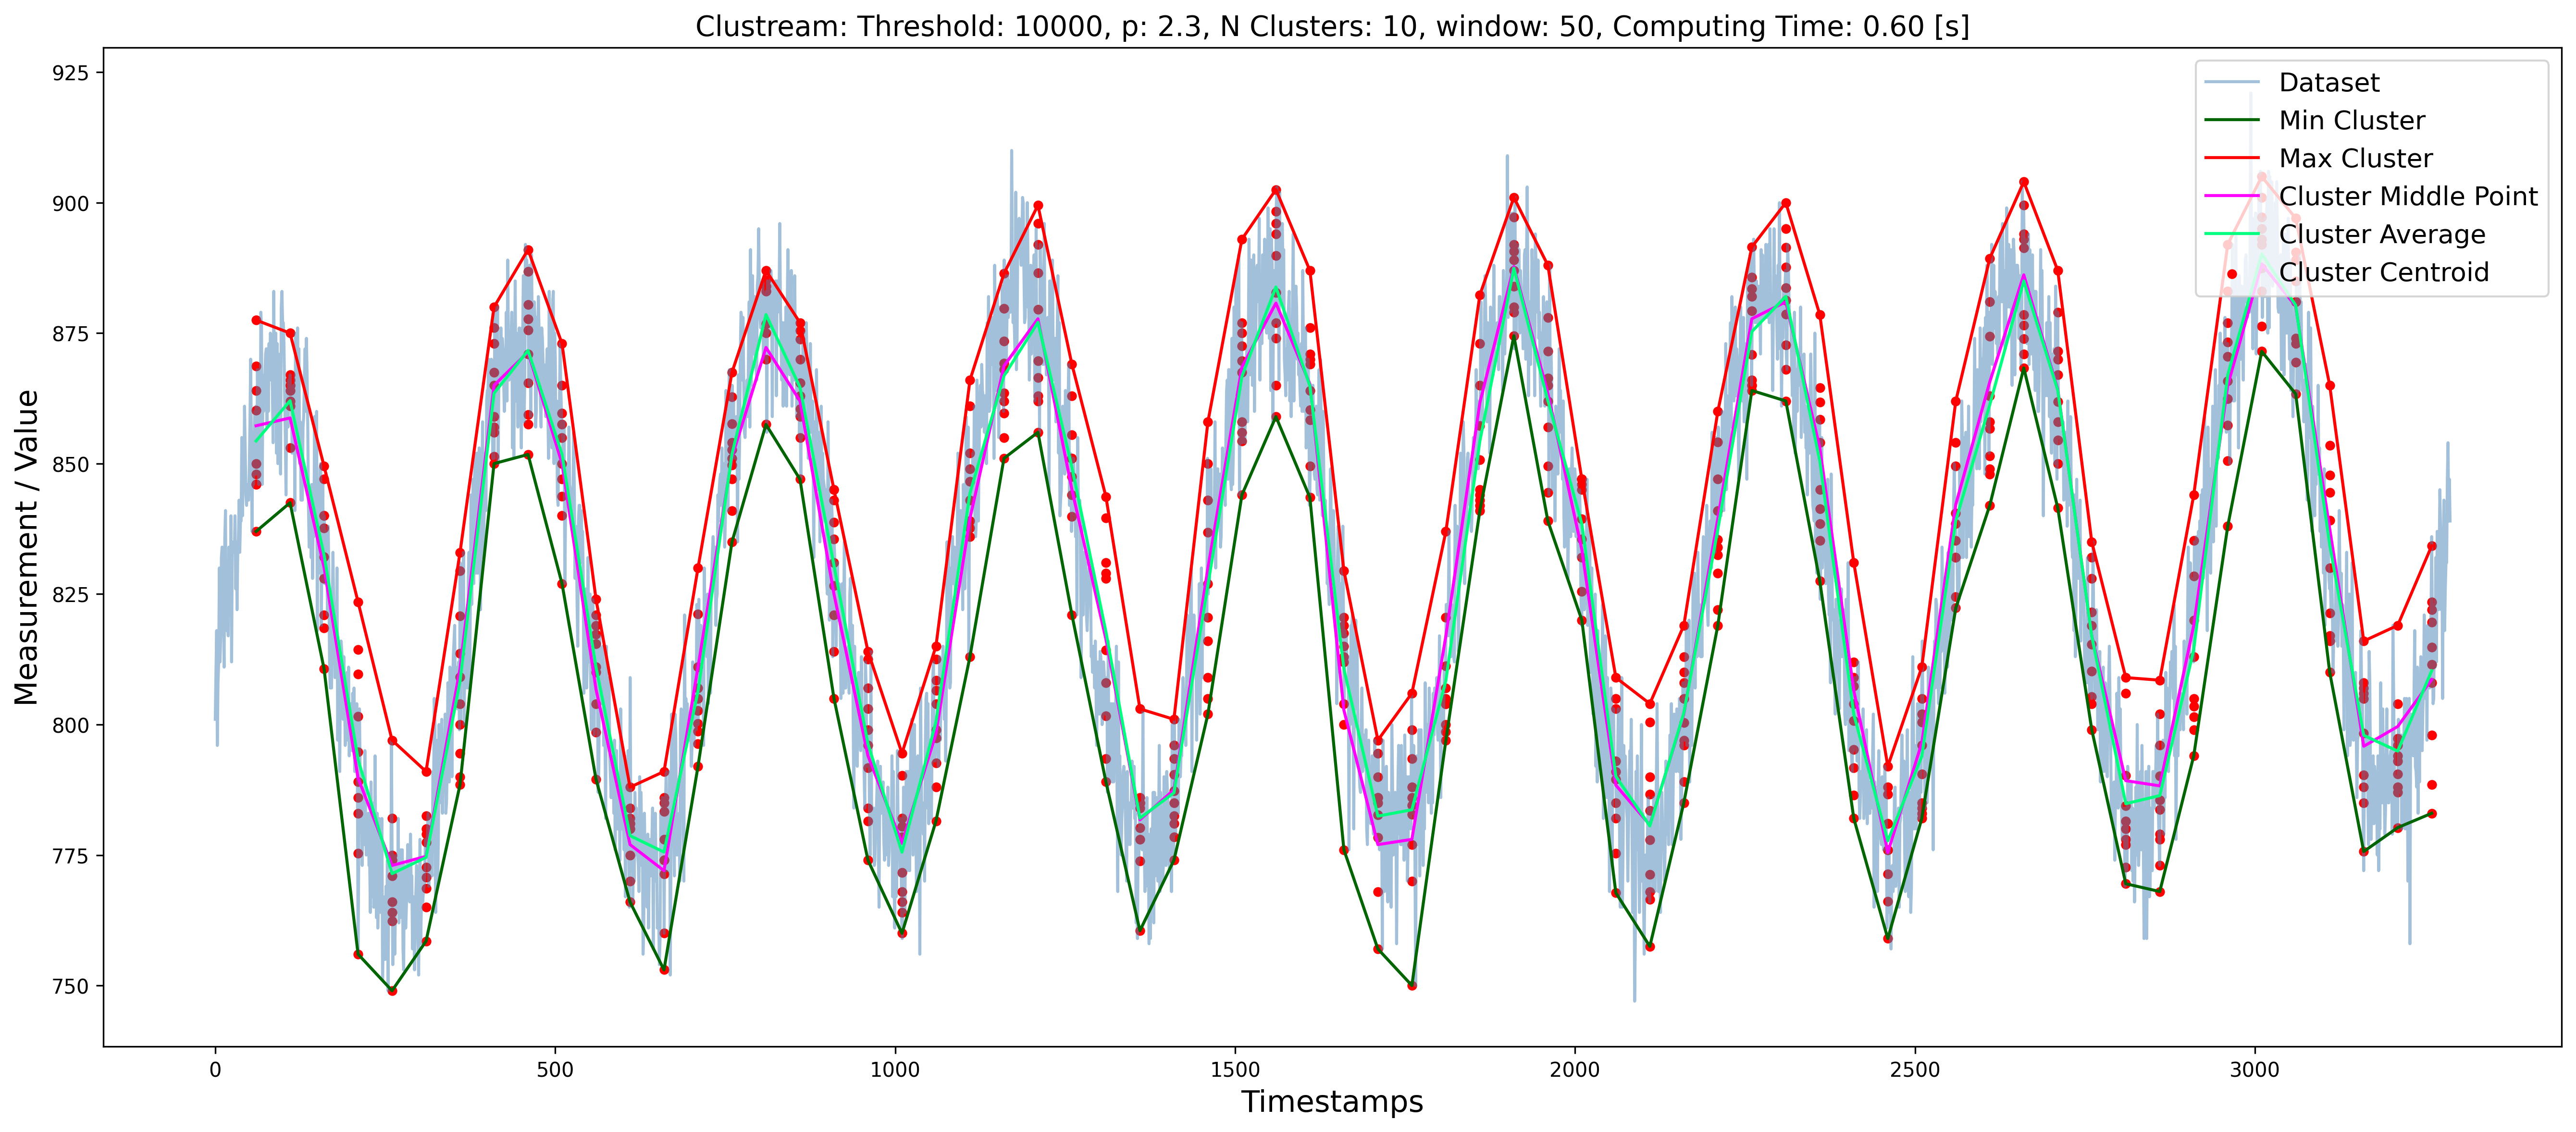

In [5]:
from Framework.Algorithms.CluStream.Clustream import Clustream
n_clusters = 10
accountant_reader = TimeSeriesAccountantDataset(dr_url)
clustream = Clustream(accountant_reader, time_window_length=window, number_of_clusters=n_clusters, p=2.3, threshold=10000)
clustream_time, _, _, clustream_ssq, clustream_taassq, clustream_cluster_count, clustream_pearson, clustream_assq = full_array_of_tests(clustream, show_snaps, onlyrun=False)
print("SSQ: ", str(clustream_ssq))
print("ASSQ" , str(clustream_assq))
print("TSSQ: ", str(clustream_taassq))
print("Pearson: ", str(clustream_pearson))

Plotting Birch Clusters: 100%|██████████| 65/65 [00:02<00:00, 24.53it/s]


1195
SSQ:  21600.96665405552
ASSQ 11307175.892034173
TSSQ:  4734695479.9667425
Pearson:  (array([0.99997217, 0.99999992, 0.99999298]), array([3.44166395e+04, 3.24185874e+01, 9.11446062e+03]))


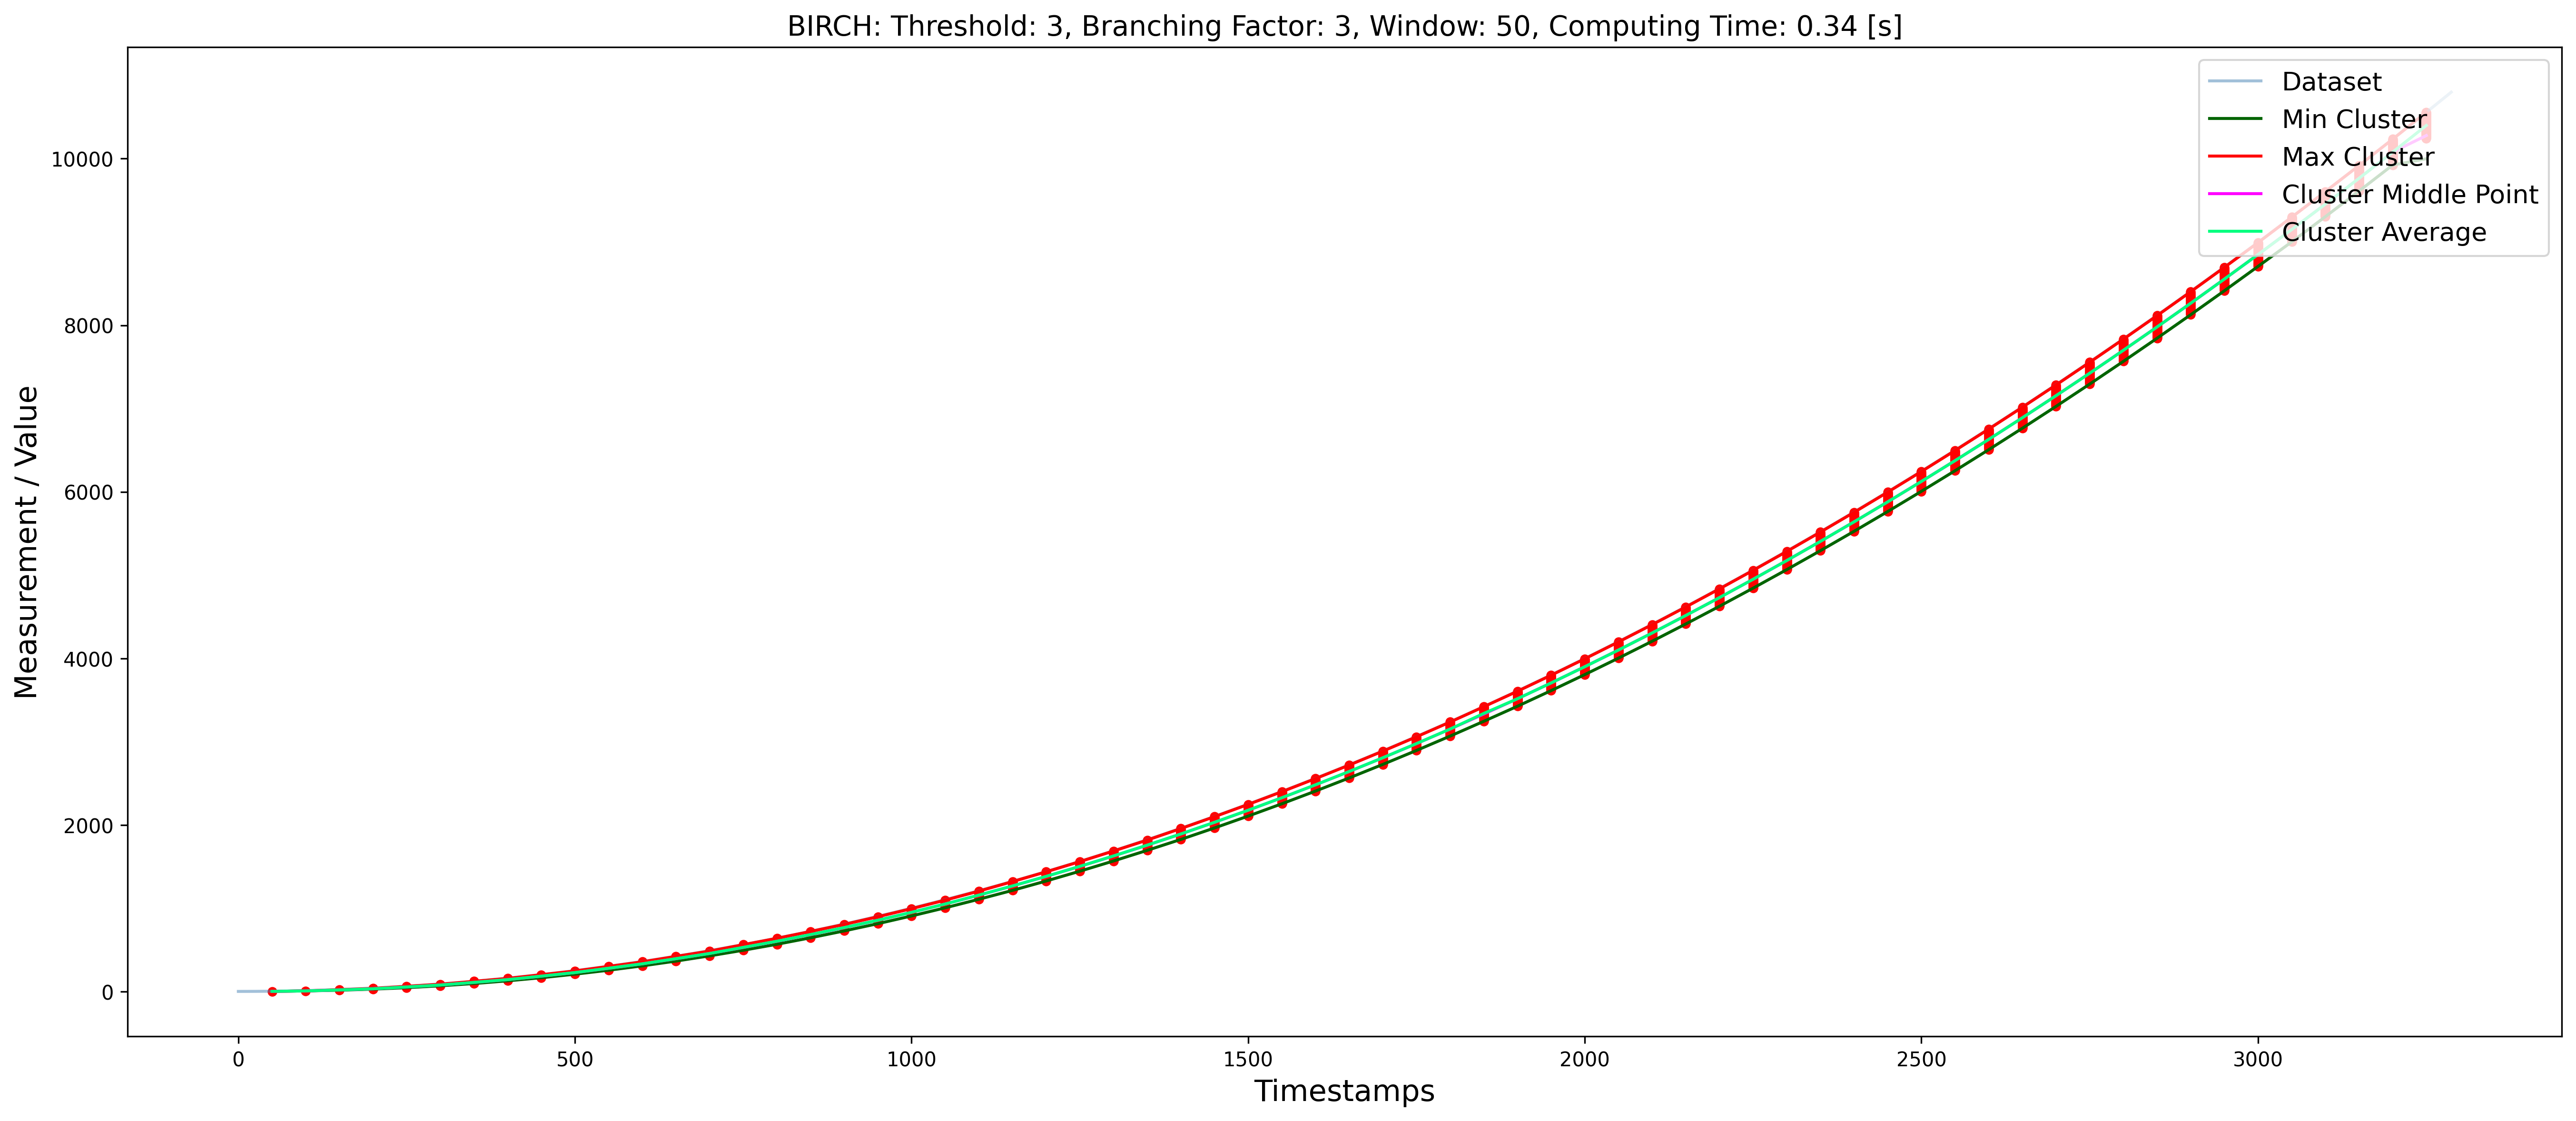

In [ ]:
from Framework.Algorithms.BIRCH.BIRCH import Birch
accountant_reader = TimeSeriesAccountantDataset(dr_url)
# birch_window = Birch(window=window, dataset_reader=accountant_reader, threshold=2.3, branching_factor=3)
birch_window = Birch(window=50, dataset_reader=accountant_reader, threshold=3, branching_factor=3)# was 3.7, 4
birch_time, _, _, birch_ssq, birch_taassq, birch_cluster_count, birch_pearson, birch_assq = full_array_of_tests(birch_window, show_snaps, windowed=True, show_dataset=True, show_envelope=True)
print(birch_cluster_count)
print("SSQ: ", str(birch_ssq))
print("ASSQ" , str(birch_assq))
print("TSSQ: ", str(birch_taassq))
print("Pearson: ", str(birch_pearson))

Start


Plotting DenStream Clusters: 100%|██████████| 65/65 [00:04<00:00, 14.48it/s]


N_Clusters:  1682
SSQ:  4436103.778879394
ASSQ 17564997.76910951
TSSQ:  4700483595.687886
Pearson:  (array([0.99991354, 0.99999999, 0.99997886]), array([3.09926520e+04, 1.44065294e+01, 8.11497276e+03]))


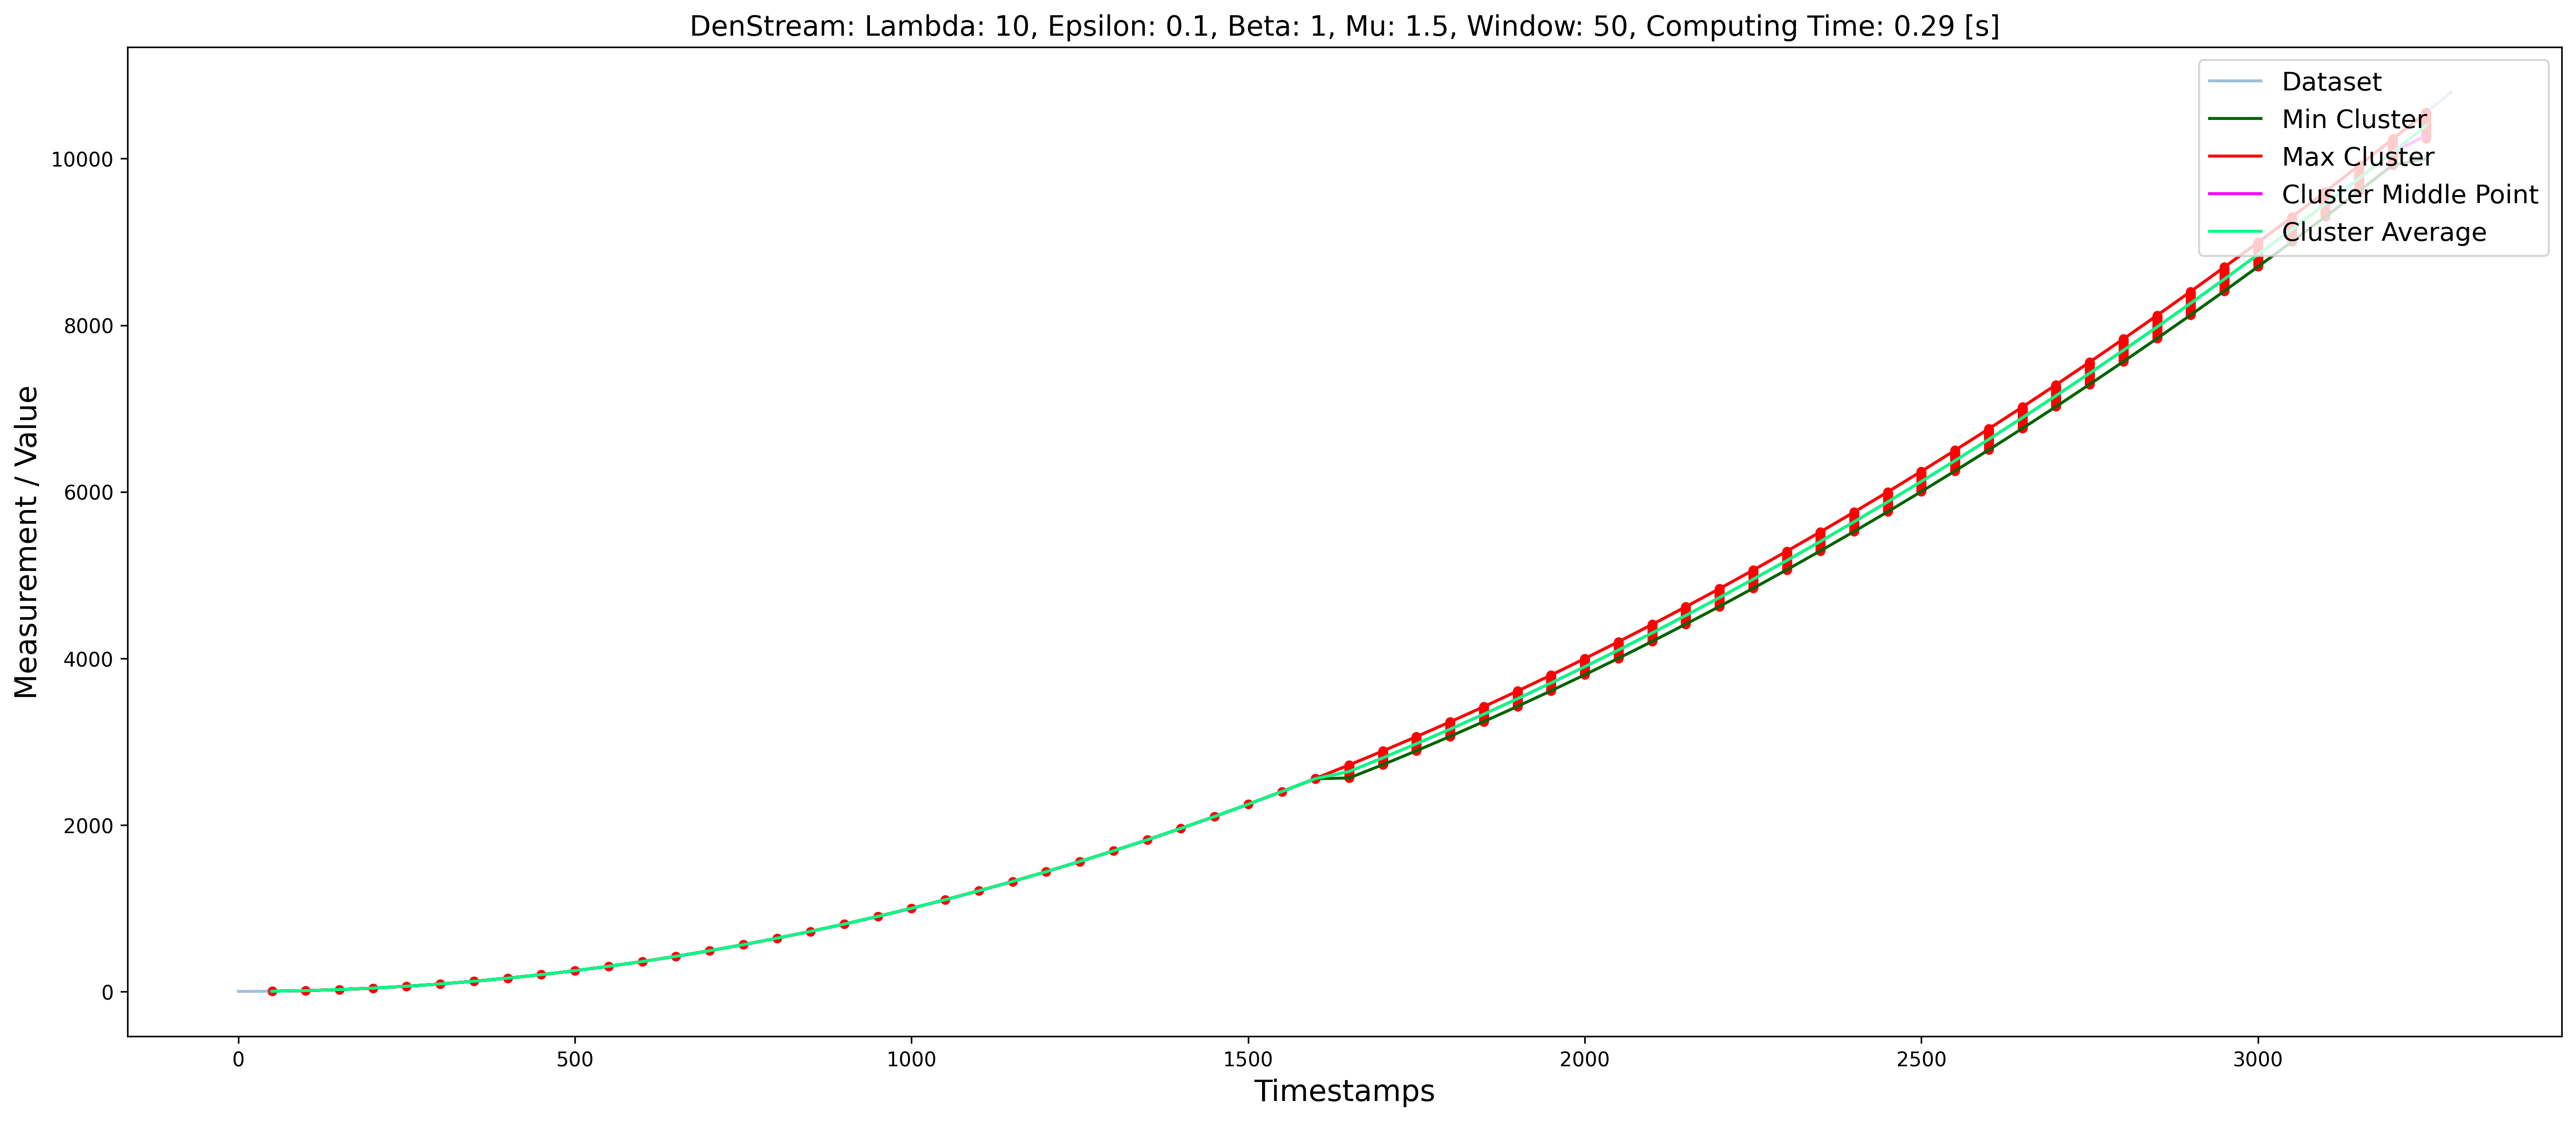

In [ ]:
print('Start')
from Framework.Algorithms.DenStream.DenStream import DenStream
accountant_reader = TimeSeriesAccountantDataset(dr_url)
denstream = DenStream(accountant_reader, lambd=10, eps=0.1, mu=1.5, window=window)
denstream_time, _, _, denstream_ssq, denstream_taassq, denstream_cluster_count, denstream_pearson, denstream_assq = full_array_of_tests(denstream, show_snaps, nograph=False, windowed=True,show_envelope=True)
print("N_Clusters: ", str(denstream_cluster_count))
print("SSQ: ", str(denstream_ssq))
print("ASSQ" , str(denstream_assq))
print("TSSQ: ", str(denstream_taassq))
print("Pearson: ", str(denstream_pearson))

Plotting DStream Clusters: 100%|██████████| 65/65 [00:00<00:00, 90.13it/s]


N_Clusters:  176
SSQ:  55037156389.61913
ASSQ 1100845290.600624
TSSQ:  382748984761103.56
Pearson:  (array([0.6143976 , 0.59600326, 0.60575279]), array([17327639.6587017 , 17326795.87032662, 17327018.65214925]))


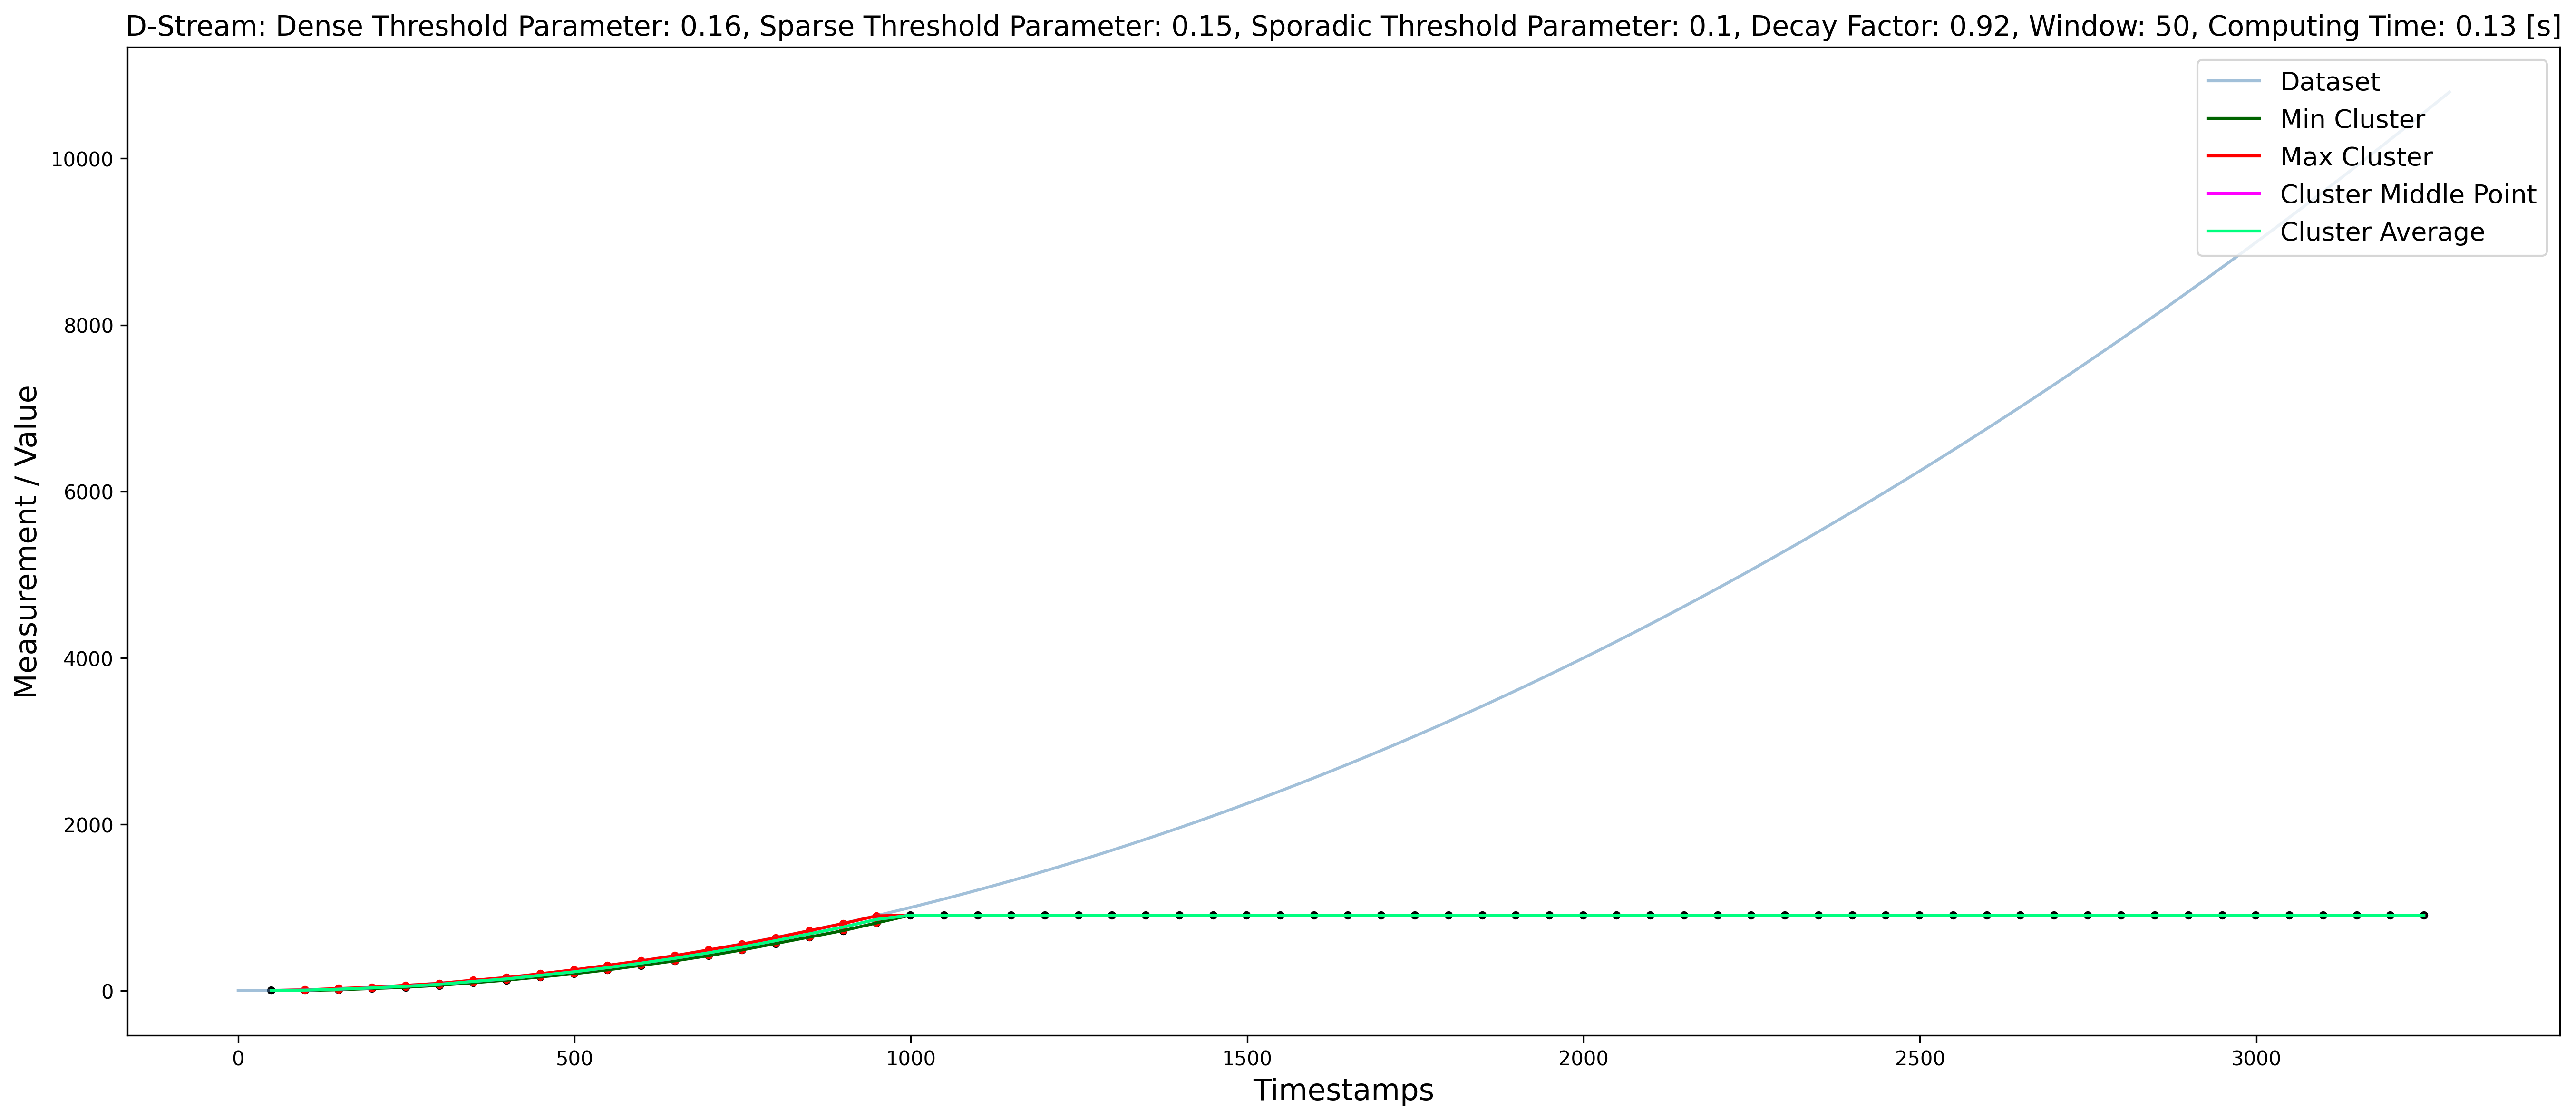

In [ ]:
from Framework.Algorithms.Dstream.DStream import DStream
accountant_reader = TimeSeriesAccountantDataset(dr_url)
partitions = 22
top = 910
bottom = 740
dr = TimeSeriesAccountantDataset(dr_url)
dstream = DStream(accountant_reader, domains_per_dimension=((bottom, top), None), partitions_per_dimension=(partitions, None), dimensions=1, window=window, decay_factor = 0.92, sporadic_threshold_parameter=0.1, sparse_threshold_parameter=0.15, dense_threshold_parameter=0.16)
dstream_window_time, _, _, dstream_ssq, dstream_taassq, dstream_cluster_count, dstream_pearson, dstream_assq = full_array_of_tests(dstream, show_snaps, nograph=False, windowed=True,show_envelope=True)
print("N_Clusters: ", str(dstream_cluster_count))
print("SSQ: ", str(dstream_ssq))
print("ASSQ" , str(dstream_assq))
print("TSSQ: ", str(dstream_taassq))
print("Pearson: ", str(dstream_pearson))